In [14]:
from numpy import array
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib as mp
import time
import seaborn as sb
import matplotlib as mpl 
import matplotlib.pyplot as plt


# Sections of the report 

-	Abstract
-	Introduction
-	Methods
    -	Cleaning the data and creating new input features
    - Analysing and visualising the data
    - Preparing the inputs and choosing suitable features
    - Selecting and training a model
- Training the model
- K fold cross validation
- Fine-tuning the models
-	Evaluation
-	Discussion 
-	Conclusion


## 1. Introduction

This study will be taking a data driven approach towards classifying images of seals

## 2. Method

### 2. 1 Loading and cleaning the data set


In [2]:
# Load the datasets
X_train_bin = pd.read_csv('/data/CS5014-P2/binary/X_train.csv', header=None)
Y_train_bin = pd.read_csv('/data/CS5014-P2/binary/Y_train.csv', header=None)
X_test_bin = pd.read_csv('/data/CS5014-P2/binary/X_test.csv', header=None)
X_train_mult = pd.read_csv('/data/CS5014-P2/multi/X_train.csv', header=None)
Y_train_mult = pd.read_csv('/data/CS5014-P2/multi/Y_train.csv', header=None)
X_test_mult = pd.read_csv('/data/CS5014-P2/multi/X_test.csv', header=None)

###  Cleaning the dataset

a) **Check for Null-values and inconsistent data types:** Upon looking at that dataset, we can see that each column has an equal amount of non-null values, indicating that there are **no instances** of missing data. Moreover, all the data types are float64, indicating a consistency in data format

In [35]:
# Check for Null-values
print(X_train_mult.info(null_counts=True))
print(X_train_bin.info(null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62210 entries, 0 to 62209
Columns: 964 entries, 0 to 963
dtypes: float64(964)
memory usage: 457.5 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62210 entries, 0 to 62209
Columns: 964 entries, 0 to 963
dtypes: float64(964)
memory usage: 457.5 MB
None


b) **Check for duplicate values**: No duplicate values were found

In [4]:
# remove duplicate rows
datasets = [X_train_bin,Y_train_bin, X_test_bin, X_train_mult, Y_train_mult, X_test_mult]

for data in datasets:
    duplicate_rows = data[data.duplicated()]
    print(len(duplicate_rows))



0
62208
0
0
62205
0


No null values, no duplicate and all the data types were for the dtype float64. Nothing needed to change so will proceed to visualising the dataset


### 2.1 Analysing and Visualising the dataset

#### 2.1.1 Visualising the images


The dataset has 62210 images, with around 964 features. To visualise the images, I sliced the first
900 columns to get the Histogram of Orientated Gradient (HOG) features and picked an image from each class found in the Y_train datasets

Figure 1 below, showes the images taken from the binary dataset, where classes are either background and seal. 
Figure 2, shows images from the multi dataset, where images are background, dead pup, whitecoat, moulted pup, juvenile

In [152]:
bin_classes = ['background','seal']
mult_classes = ['background','dead pup', 'whitecoat', 'moulted pup', 'juvenile']

def get_rows_and_titles(classes, dataset, num):
    rows = np.array([])
    titles = np.array([])
    for i in classes:
        filt = dataset.iloc[:,0] == i
        filtered_data = dataset[filt].head(num)
        rows = np.concatenate([rows, filtered_data.index.values])
        titles = np.concatenate([titles, array(filtered_data.iloc[:,0])])
    
    return rows.astype(int), titles  
      
        
bin_rows, bin_titles = get_rows_and_titles(bin_classes, Y_train_bin,5)
mult_rows, mult_titles = get_rows_and_titles(mult_classes, Y_train_mult,2)

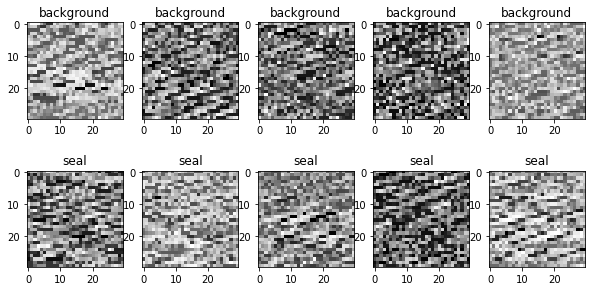

In [153]:
# classes in the  binary dataset
no_rows_bin  = 2
no_rows_mult = 2
def print_images(no_rows,row_numbers, titles, dataset, width, height): 
    fig = plt.figure(figsize=(width, height))
    for i in range(1, len(row_numbers) +1): 
        output = array(dataset.iloc[row_numbers[i-1], :900])
        output_image = output.reshape(30, 30)
        fig.add_subplot(no_rows, 5, i)
        plt.imshow(output_image, cmap = mpl.cm.binary, interpolation="nearest")
        plt.title(titles[i-1])
        plt.axis("on")
        
    plt.show()

print_images(no_rows_bin, bin_rows, bin_titles, X_train_bin,10,5)

In [154]:
# classes in the  multi dataset
multi_row_numbers = [7782, 7266, 0, 4982, 7532]
multi_titles = ['background','dead pup', 'whitecoat', 'moulted pup', 'juvenile']
multi_columns = 5
        
print_images(multi_row_numbers, multi_titles, X_train_mult, multi_columns,10)

TypeError: print_images() missing 1 required positional argument: 'height'

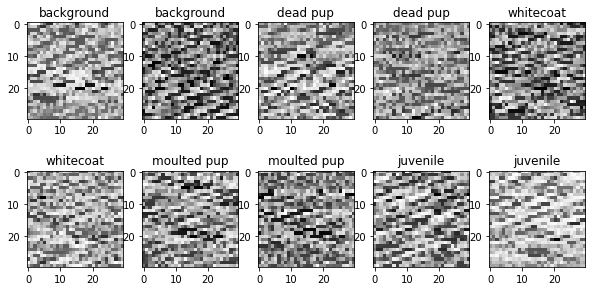

In [156]:
print_images(no_rows_mult, mult_rows, mult_titles, X_train_mult,10,5)

In both datasets, we can see that the "backgound" classes appears to have the least amount of dark pixelation compared to the others. 
In the mult-classification dataset, the whitecoat image appears to be the most distinct
